In [1]:
import matplotlib.pyplot as plt
import math

In [4]:
sim_time_end = 50
time = [z for z in range(sim_time_end)]
def step(time,period,hi_val,low_val):
    if (time%period)==0:
        step.pol=not step.pol
    if step.pol:
        return hi_val
    else:
        return low_val
step.pol=True

def clip(n,min,max) :
    if n<min:
        n=min
    if n>max:
        n=max
    return n    

def running_avg(input,tau,time_delta):
    alpha = math.exp(-tau/time_delta)
    running_avg.budget = alpha*input +(1-alpha)*running_avg.budget
    return running_avg.budget
    

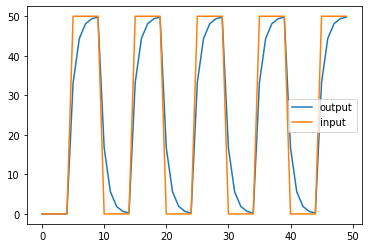

In [10]:
running_avg.budget = 0.0
input = [step(t,5,50,00) for t in time]
output = [running_avg(t,0.41,1) for t in input]
plt.plot(time, output,label='output')
plt.plot(time, input,label='input')
#plt.plot(time, running_avg.budget,label='budget')
plt.legend()
plt.show()

In [12]:
def pid(dt,setpoint,measured,Kp,Ki,Kd) :
    error = setpoint - measured
    proportional = error
    pid.integral = pid.integral + error * dt
    derivative = (error - pid.previous_error) / dt
    output = clip(Kp * proportional + Ki * pid.integral + Kd * derivative,0,100)
    pid.previous_error = error
    #####
    pid.sampled['proportional'].append(proportional)
    pid.sampled['integral'].append(pid.integral)
    pid.sampled['derivative'].append(derivative)
    return output

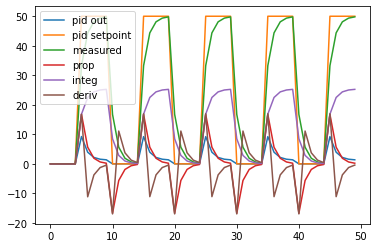

In [14]:
import random
input = [step(t,5,50,00) for t in time]
pid.integral =0 
pid.previous_error =0 
pid.sampled ={'proportional':[] , 'integral':[],'derivative':[]} 
#measured = [20 for t in time]
#measured = [t/1.1 for t in input]
#measured = [random.randint(t-random.randint(0,0.1*t),t+random.randint(0,0.1*t)) for t in input]
measured = output
pid_output = [pid(1,item,measured[index],0.5,0.05,0.0001)  for index,item in enumerate(input)]
plt.plot(time, pid_output, label="pid out")
plt.plot(time, input,label="pid setpoint")
plt.plot(time, measured,label="measured")
plt.plot(time, pid.sampled['proportional'],label="prop")
plt.plot(time, pid.sampled['integral'],label="integ")
plt.plot(time, pid.sampled['derivative'],label="deriv")
plt.legend()
plt.show()